- 기존 뉴럴 네트워크의 가중치 -> 고정
- 베이지안 뉴럴 네트워크의 가중치 -> 분포
  - 가중치 분포에 대한 샘플링으로 결괏값에 대한 불확실성을 측정할 수 있게 됨.

In [10]:
pip install torchbnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install blitz-bayesian-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpy as numpy

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

from torchvision import datasets

from blitz.modules import BayesianLinear

import matplotlib.pyplot as plt

# Model

In [19]:
class BayesianRegressor(nn.Module):
   def __init__(self, input_dim, output_dim):
      super().__init__()
      self.linear = nn.Linear(input_dim, output_dim)
      self.blinear1 = BayesianLinear(input_dim, 64)
      self.blinear2 = BayesianLinear(64, output_dim)

   def forward(self, x):
       h1 = self.linear(x)
       h2 = self.blinear1(h1)
       output = self.blinear2(h2)

       return output



## Variational_Estimator

In [ ]:
class BayesianRegressor(nn.Module):
   def __init__(self, input_dim, output_dim):
       super().__init__()
       self.blinear1 = BayesianLinear(input_dim, 512)
       self.blinear2 = BayesianLinear(512, output_dim)

    def forward(self, x)
       h1 = self.blinear1(x)
       output = self.blinear2(h1)

       return output


#reg = BayesianRegressor()
#predict = reg(dataset)

# loss function
# fit_loss = criterion(predict, labels)
# complexity_lose = reg.nn_kl_divergence()

# true_loss = fit_loss + complecity_loss

## Train

In [ ]:
#iteration = 0
#for epoch in range(100):
#    for i, (datapoints, labels) in enumerate(dataloader_train):
#        optimizer.zero_grad()
#        
#        loss = regressor.sample_elbo(inputs=datapoints,
#
#                           labels=labels,
#                           criterion=criterion,
#                           sample_nbr=3)
#        loss.backward()
#        optimizer.step()
#        
#        iteration += 1
#        if iteration%100==0:
#            ic_acc, under_ci_upper, over_ci_lower = evaluate_regression(regressor,
#                                                                        X_test,
#                                                                        y_test,
#                                                                        samples=25,
#                                                                        std_multiplier=3)
#            
#            print("CI acc: {:.2f}, CI upper acc: {:.2f}, CI lower acc: {:.2f}".format(ic_acc, under_ci_upper, over_ci_lower))
#            print("Loss: {:.4f}".format(loss))

- blitz's **varaitional_estimator** decorator also powers the neural network with the **sample_elbo method**

- Given the inputs, outputs, ciriterion and sample_nbr, it estimates does the iterative process on calculating the loss over the batch sample_nbr times and gathers its mean, returning the sum of the complexity loss with the fitting one

## Defining a Confidence Interval Evaluating Funciton

- 불확실성을 측정하는 함수
- 같은 x에 대해서 여러번의 샘플링을 통해서 여러 개를 생성하고 그것을 통해 평균과 표준 편차를 구해서 신뢰구간 구함

In [ ]:
#def evaluate_regression(regressor,
#                        X,
#                        y,
#                        samples = 100,
#                        std_multiplier = 2):
#    preds = [regressor(X) for i in range(samples)]
#    preds = torch.stack(preds)
#    means = preds.mean(axis=0)
#    stds = preds.std(axis=0)
#    ci_upper = means + (std_multiplier * stds)
#    ci_lower = means - (std_multiplier * stds)
#    ic_acc = (ci_lower <= y) * (ci_upper >= y)
#    ic_acc = ic_acc.float().mean()
#    return ic_acc, (ci_upper >= y).float().mean(), (ci_lower <= y).float().mean()

# Classification Example

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from blitz. modules import BayesianLinear
from blitz.utils import variational_estimator

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.datasets
import torch
import numpy as np

In [73]:
np.random.seed(0)
x, y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [74]:
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(np.expand_dims(y, -1))

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)


x_train, y_train = torch.tensor(x_train).float(), torch.tensor(y_train).float()
x_test, y_test = torch.tensor(x_test).float(), torch.tensor(y_test).float()

In [75]:
ds_train = torch.utils.data.TensorDataset(x_train, y_train)
dataloader_train = torch.utils.data.DataLoader(ds_train, batch_size=16, shuffle=True)

ds_test = torch.utils.data.TensorDataset(x_test, y_test)
dataloader_test = torch.utils.data.DataLoader(ds_test, batch_size=16, shuffle=True)

## Variational Estimator

In [76]:
@variational_estimator
class BayesianRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        #self.linear = nn.Linear(input_dim, output_dim)
        self.blinear1 = BayesianLinear(input_dim, 512)
        self.blinear2 = BayesianLinear(512, output_dim)
        
    def forward(self, x):
        x_ = self.blinear1(x)
        return self.blinear2(x_)

## Defining a confidence interval evaluating function

- this function does create a confidence interval for each prediction on the batch on which we are trying to sample the label value.

- we then can measure the accuracy of our predictions by seeking how much of the prediction distributions did include the correct label for the datapoint

In [77]:
def evaluate_regression(regressor, x, y, samples=100, std_multiplier=2):
  preds = [regressor(x) for i in range(samples)]
  preds = torch.stack(preds) # torch.stack: 새로운 차원으로 주어진 텐서들을 부티는 함수

  means = preds.mean(axis=0)
  stds = preds.std(axis=0)

  ci_upper = means + (std_multiplier*stds)
  ci_lower = means - (std_multiplier*stds)

  ic_acc = (ci_lower<=y)*(ci_upper>=y)
  ic_acc = ic_acc.float().mean()

  return ic_acc, (ci_upper>=y).float().mean(), (ci_lower<=y).float().mean()

## Creating our regressor and loading data

In [78]:
regressor = BayesianRegressor(13,1)
optimizer = optim.SGD(regressor.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

## Training and evaluating loop

- we do a training loop that only differs from a common Torch training by having its loss sampled by its **sample_elbo method**

- all the other stuff can be done normally, as our purpose with blitz is to ease your life on iterating on your data with different bayesian neural networks without trouble

In [81]:
iteration = 0
loss_list = []
for epoch in range(100):
    for i, (datapoints, labels) in enumerate(dataloader_train):
        optimizer.zero_grad()
        
        loss = regressor.sample_elbo(inputs=datapoints,
                           labels=labels,
                           criterion=criterion,
                           sample_nbr=3)
        loss.backward()
        optimizer.step()
        
        iteration += 1
        if iteration%100==0:
            ic_acc, under_ci_upper, over_ci_lower = evaluate_regression(regressor,
                                                                        X_test,
                                                                        y_test,
                                                                        samples=25,
                                                                        std_multiplier=3)
            
            print("CI acc: {:.2f}, CI upper acc: {:.2f}, CI lower acc: {:.2f}".format(ic_acc, under_ci_upper, over_ci_lower))
            print("Loss: {:.4f}".format(loss))
            loss_list.append(loss.item())

CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 19783.0137
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 19485.2266
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 19258.7363
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 18925.9688
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 18650.6348
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 18446.4062
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 18235.2520
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 17955.3613
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.39
Loss: 17759.7812
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.39
Loss: 17471.4453
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.39
Loss: 17205.6426
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.39
Loss: 16976.9844
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.39
Loss: 16727.9609
CI acc: 0.02, CI upper acc: 0.64, CI lower acc: 0.38
Loss: 16414.1191
CI acc: 0.02, CI upp

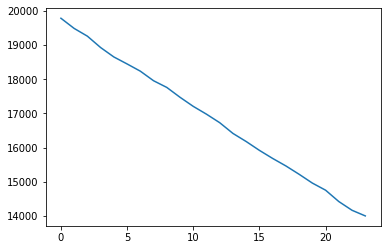

In [83]:
plt.plot(loss_list)